In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [133]:
df_sm = pd.read_csv('densenet_score_margin.csv', index_col=0)
df_th = pd.read_csv('densenet_confidence.csv', index_col=0)

len(df_sm.loc[(df_sm['threshold'] == 0.6) & (df_sm['exit'] == 0) & (df_sm['correct']==0)])/500

0.018

In [113]:
th_num_exited_at_exit = []
th_exit_acc = []
th_exit_acc_if_exited = []
th_false_if_exited = []
th_time = []

for exit in range(0,4):
    exit_n_frac = []
    exit_n_acc_exited = []
    exit_n_false = []
    exit_n_acc = []
    exit_time = []
    for t in np.arange(0.1, 1, 0.1):
        n_exited = len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1)])
        exit_n_frac.append(n_exited)
        exit_n_acc_exited.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1) & (df_th['correct']==1)])/n_exited)
        exit_n_false.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1) & (df_th['correct']==0)])/n_exited)
        exit_n_acc.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['correct']==1)])/500)
        
    th_num_exited_at_exit.append(exit_n_frac)
    th_exit_acc.append(exit_n_acc)
    th_false_if_exited.append(exit_n_false)
    th_exit_acc_if_exited.append(exit_n_acc_exited)
    th_time.append(exit_time)
    
    tmp = df_th.loc[(df_th['exit'] == exit)]
    exit_time.append(tmp['time'])
    
sm_num_exited_at_exit = []
sm_exit_acc = []
sm_exit_acc_if_exited = []
sm_false_if_exited = []
sm_time = []

for exit in range(0,4):
    exit_n_frac = []
    exit_n_acc_exited = []
    exit_n_false = []
    exit_n_acc = []
    for t in np.arange(0.1, 1, 0.1):
        n_exited = len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1)])
        exit_n_frac.append(n_exited)
        exit_n_acc_exited.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1) & (df_sm['correct']==1)])/n_exited)
        exit_n_false.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1) & (df_sm['correct']==0)])/n_exited)
        exit_n_acc.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['correct']==1)])/500)
        tmp = df_sm.loc[(df_sm['threshold']== t) & (df_sm['exit'] == exit)]
        exit_time.append(tmp['time'])
    sm_num_exited_at_exit.append(exit_n_frac)
    sm_exit_acc.append(exit_n_acc)
    sm_false_if_exited.append(exit_n_false)
    sm_exit_acc_if_exited.append(exit_n_acc_exited)
    sm_time.append(exit_time)

In [114]:
x = np.arange(0.1, 1, 0.1)

## exit accuracy

0.796 0.922 0.968 0.97


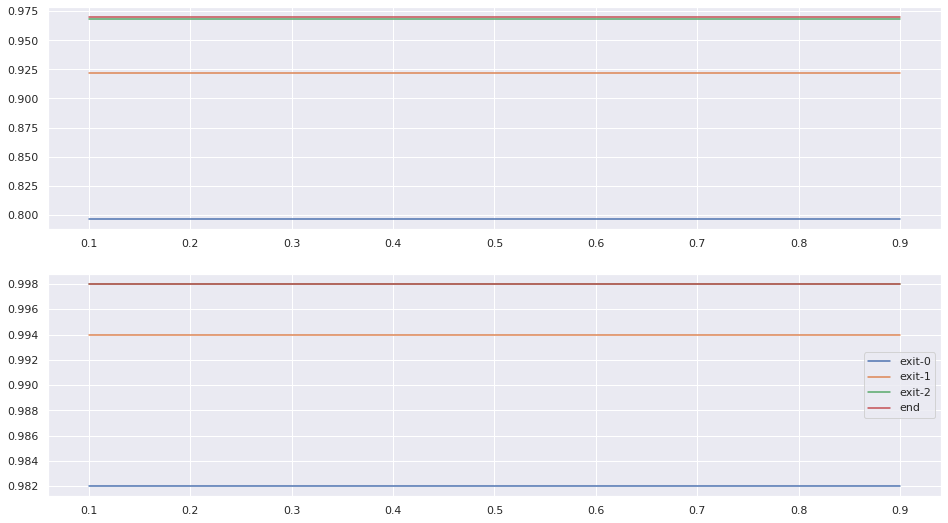

In [139]:
print(th_exit_acc[0][0], th_exit_acc[1][0], th_exit_acc[2][0], th_exit_acc[3][0])
print(sm_exit_acc[0][0], sm_exit_acc[1][0], s_exit_acc[2][0], th_exit_acc[3][0])

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_exit_acc:
    axes[0].plot(x, data)
    #plt.xticks()

for data in sm_exit_acc:
    axes[1].plot(x, data)
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## number of exited by threshold

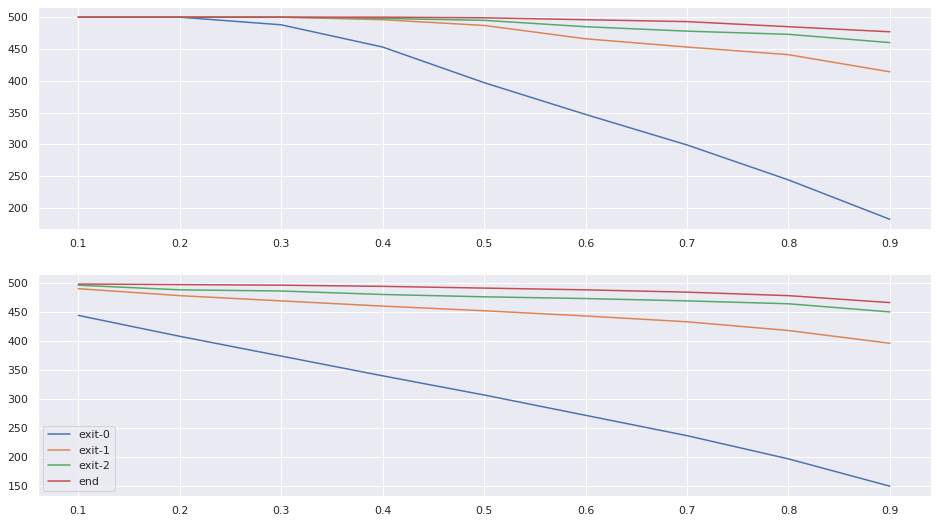

In [116]:

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_num_exited_at_exit:
    axes[0].plot(x, data)
    #plt.xticks()

for data in sm_num_exited_at_exit:
    axes[1].plot(x, data)
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## falsely exited

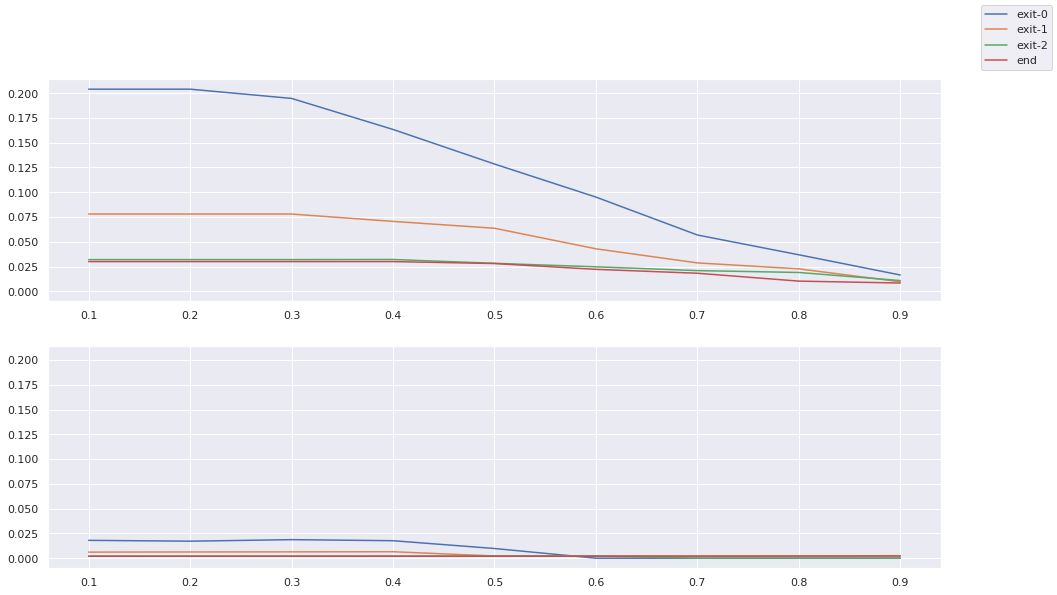

In [134]:

fig, axes = plt.subplots(2, figsize=(16,9), sharey=True)

for data in th_false_if_exited:
    axes[0].plot(x, data)

for data in sm_false_if_exited:
    axes[1].plot(x, data)
    #plt.xticks()
fig.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## accuracy only if exited

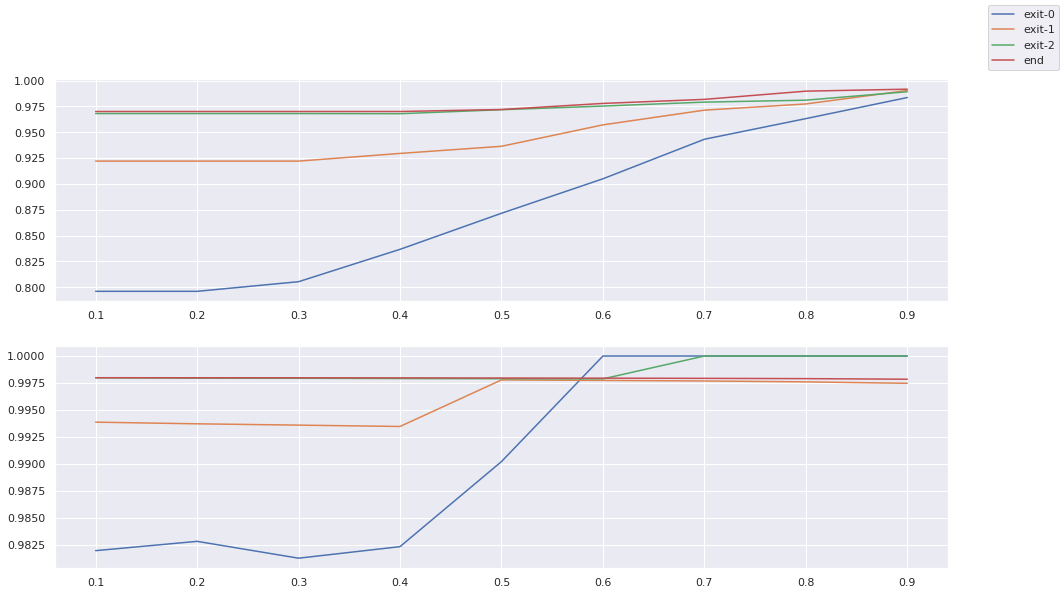

In [118]:

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_exit_acc_if_exited:
    axes[0].plot(x, data)

for data in sm_exit_acc_if_exited:
    axes[1].plot(x, data)
    #plt.xticks()
fig.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

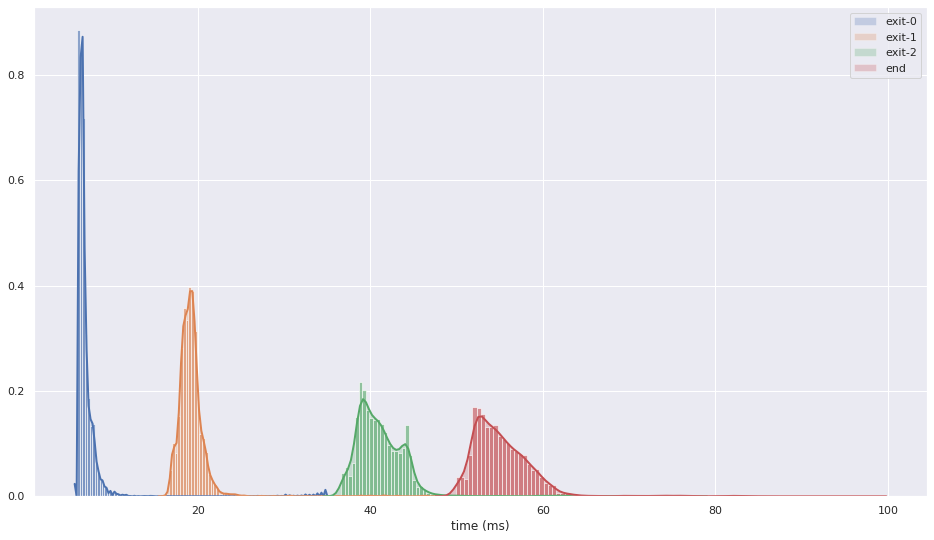

In [120]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=True, kde=True, bins=100)
plt.figure(figsize=(16,9))
for exit in range(0,4):
    sns.distplot(th_time[exit][0][1:4500], **kwargs)
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.xlabel('time (ms)')
#plt.xticks(list(range(0,36,1)))
plt.show()